## A. IMPORTING LIBRARIES

In [183]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/customer-personality-analysis/marketing_campaign.csv


## B. PREPARATION THE DATA

In [184]:
# Importing the data
data = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv",sep='\t')
data.head(10).style.background_gradient(cmap = 'Blues_r', text_color_threshold = 0.1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.000000,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.000000,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.000000,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.000000,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.000000,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


## a. Exploring the data

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [186]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [187]:
data.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


<AxesSubplot:>

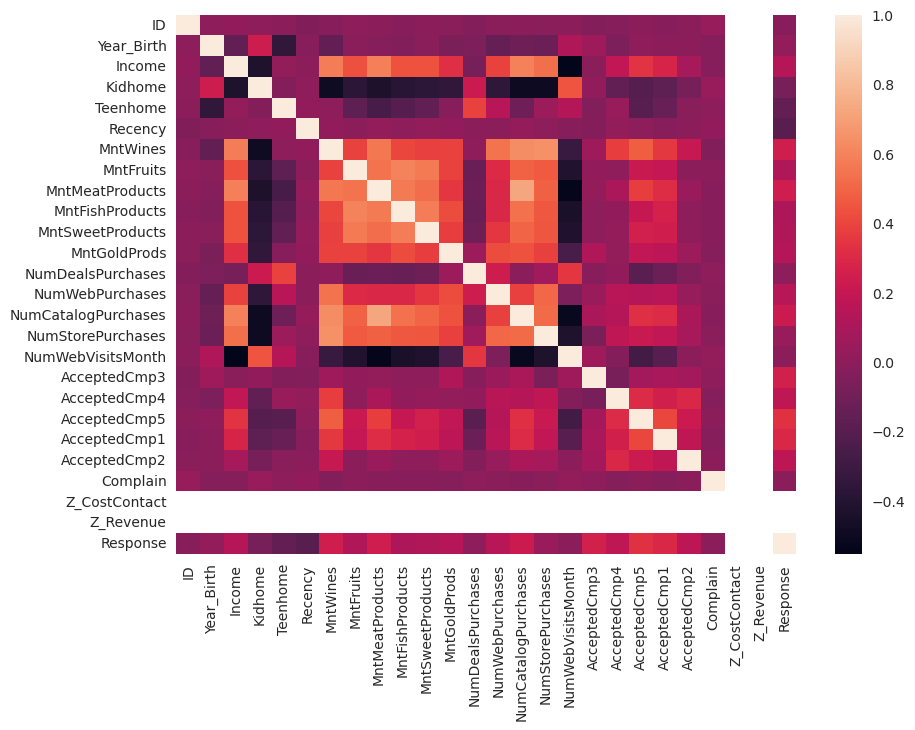

In [188]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr())

In [189]:
data.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1054,5731,1983,Master,Married,27100.0,1,0,05-04-2013,64,12,...,7,0,0,0,0,0,0,3,11,0
1392,10146,1972,PhD,Together,38887.0,1,0,02-03-2014,17,25,...,7,0,0,0,0,0,0,3,11,0
1625,7408,1952,PhD,Married,54549.0,0,1,03-03-2014,8,216,...,7,0,0,0,0,0,0,3,11,0
125,1491,1965,2n Cycle,Together,71488.0,0,0,18-02-2013,87,162,...,1,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0


## b. Data Manipulation

In [190]:
data.drop(['ID','Z_CostContact','Z_Revenue'],axis=1,inplace=True)

data['Income'].fillna(np.mean(data['Income']), inplace=True)
# Change unit to 1K $ 
data['Income'] = data['Income'] / 1000 

In [191]:
data.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [192]:
# Null values convered to mean of Income sample
mean_value = data['Income'].mean()
data['Income'].fillna(value=mean_value,inplace=True)

# converting 'Income' from float to int
#data['Income'] = data['Income'].apply(np.int64)

In [193]:
data.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

## b.1. Merge samples from the same category

In [194]:
data['kids'] = data['Kidhome'] + data['Teenhome']

In [195]:
data['Expenses'] = data['MntWines'] + data['MntFruits'] +  data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [196]:
data['Total_Cmp'] = data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['AcceptedCmp1'] + data['AcceptedCmp2']

In [197]:
data['Total_Purchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

In [198]:
data.drop(['Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
           'MntSweetProducts', 'MntGoldProds'], axis = 1, inplace = True)

In [199]:
data.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases'], axis = 1, inplace = True)

In [200]:
data['current_year'] = 2023
data['Age'] = data['current_year'] - data['Year_Birth']

data.drop(['Year_Birth','current_year'],axis=1,inplace=True)

In [201]:
data.drop(['Dt_Customer', 'Recency', 'Complain'], axis = 1, inplace = True)

In [202]:
data.drop(data[(data['Income']>200)|(data['Age']>100)].index,inplace=True)

## b. String values encoding into integer values

In [203]:
# Distribution of Education sample with histogram
figure = px.histogram(data, x= 'Education', hover_data=data.columns, title='Distribution of Education' )
figure.show()

In [204]:
# Distribution of Martial_Status sample with histogram
figure = px.histogram(data, x='Marital_Status', hover_data=data.columns, title='Distribution of Marital Status')
figure.show()

## Distributoin result

As you can see from figures, 'Education' and 'Marital_Status' are have a few feature. Therefore, we should use One Hot Encoder for Education and Martial_Stat sampels.

In [205]:
# One hot encoding with sklearn library
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(data, columns=['Education','Marital_Status'])
df.tail()

,Income,NumWebVisitsMonth,Response,kids,Expenses,Total_Cmp,Total_Purchases,Age,Education_2n Cycle,Education_Basic,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
2235,61.223,5,0,1,1341,0,18,56,0,0,...,0,0,0,0,0,1,0,0,0,0
2236,64.014,7,0,3,444,1,22,77,0,0,...,0,1,0,0,0,0,0,1,0,0
2237,56.981,6,0,0,1241,1,19,42,0,0,...,0,0,0,0,1,0,0,0,0,0
2238,69.245,3,0,1,843,0,23,67,0,0,...,1,0,0,0,0,0,0,1,0,0
2239,52.869,7,1,2,172,0,11,69,0,0,...,0,1,0,0,0,1,0,0,0,0


## d. Data Normalization

In [206]:
# Normalized data
df_norm = (df - np.min(df))/(np.max(df) - np.min(df))
df_norm.tail(5)

,Income,NumWebVisitsMonth,Response,kids,Expenses,Total_Cmp,Total_Purchases,Age,Education_2n Cycle,Education_Basic,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
2235,0.370288,0.25,0.0,0.333333,0.530159,0.00,0.409091,0.517857,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,0.387659,0.35,0.0,1.000000,0.174206,0.25,0.500000,0.892857,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,0.343885,0.30,0.0,0.000000,0.490476,0.25,0.431818,0.267857,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,0.420217,0.15,0.0,0.333333,0.332540,0.00,0.522727,0.714286,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2239,0.318292,0.35,1.0,0.666667,0.066270,0.00,0.250000,0.750000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## C. EXPLORATY DATA ANALYSIS (EDA)

<AxesSubplot:xlabel='Age', ylabel='count'>

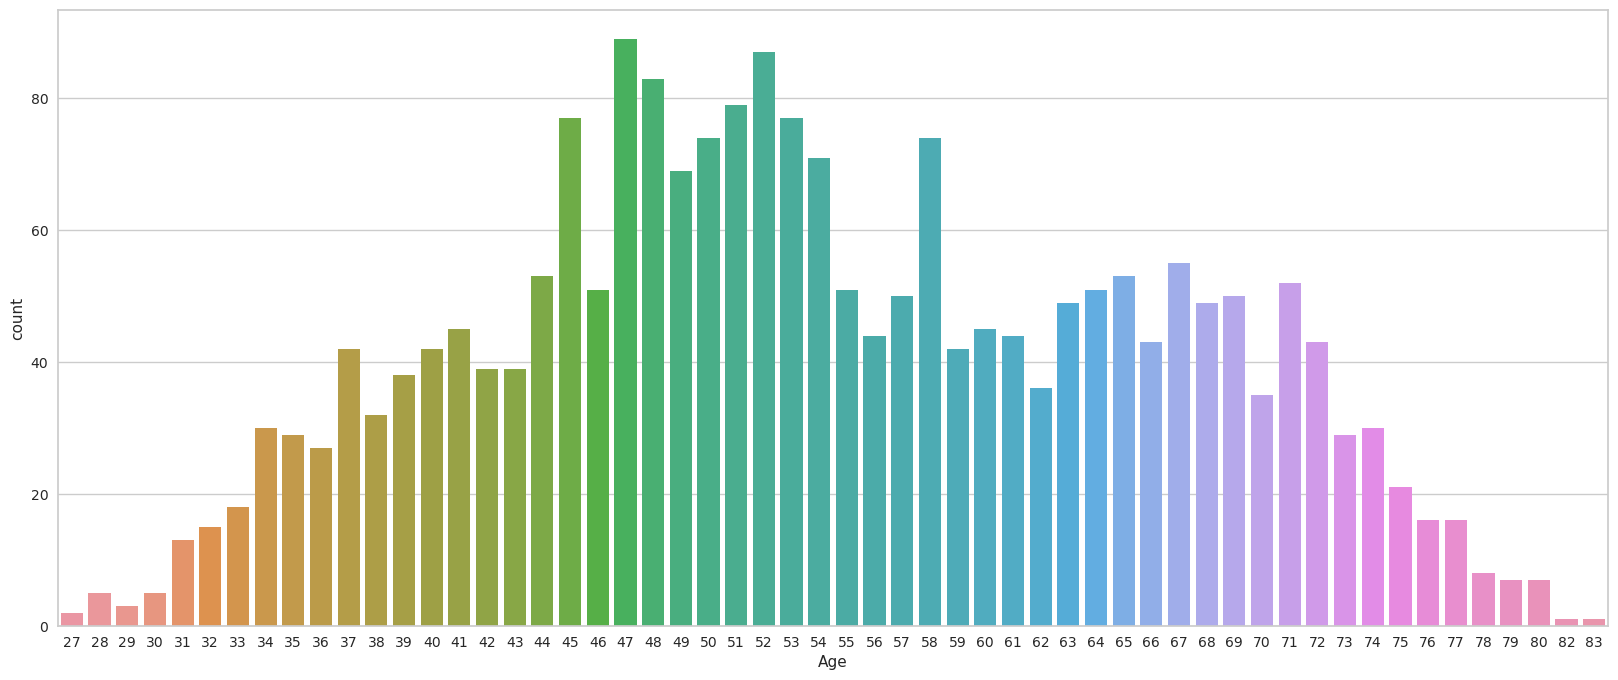

In [207]:
plt.figure(figsize = (20,8))
sns.countplot(data = df, x = 'Age')

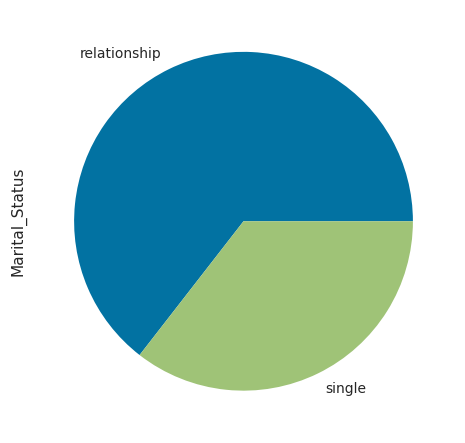

In [208]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'], 'relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'single')

plt.plot(figsize = (15,15))
data.Marital_Status.value_counts().plot(kind = 'pie')
plt.show()

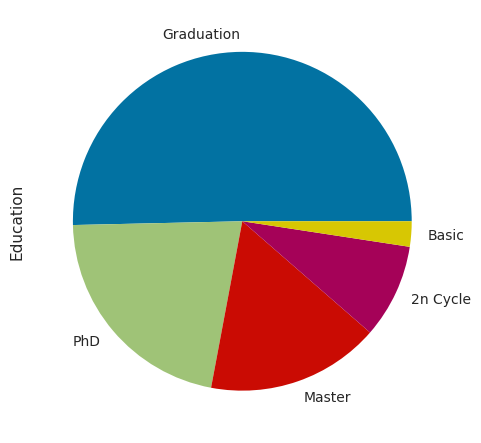

In [209]:
plt.plot(figsize=(10,10))
data.Education.value_counts().plot(kind='pie')
plt.show()

## D. CLUSTERING ALGORITHMS

## K-Means Clustering

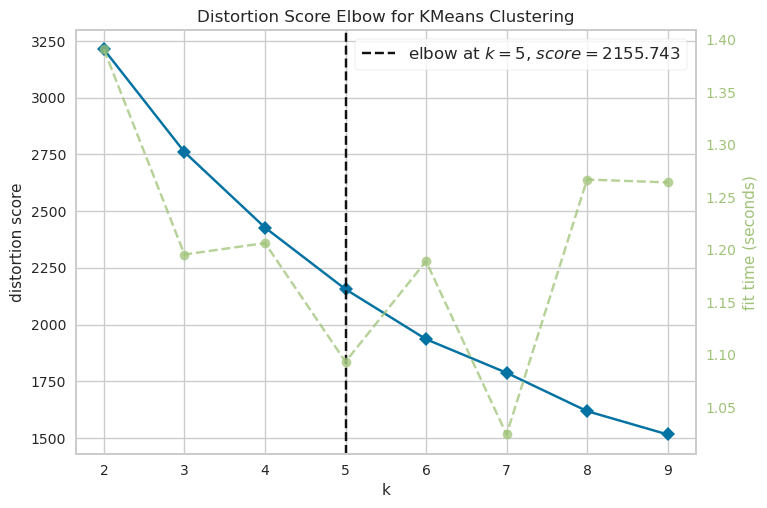

In [210]:
# Distortion Score Elbow
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_norm)
visualizer.show()
plt.show()

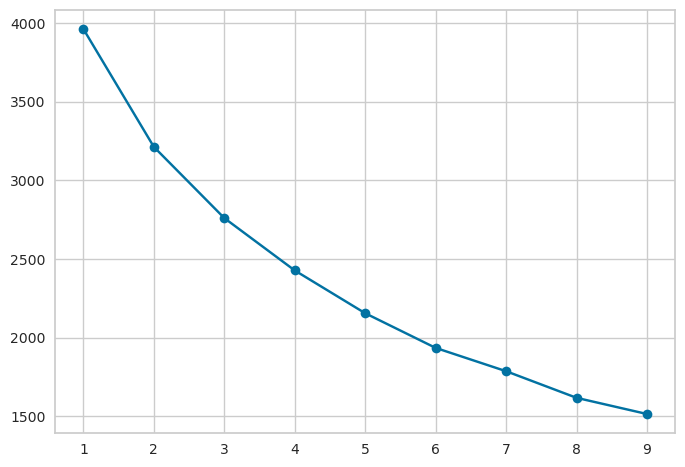

In [211]:
# WCSS value
wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=1)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss,marker='o')

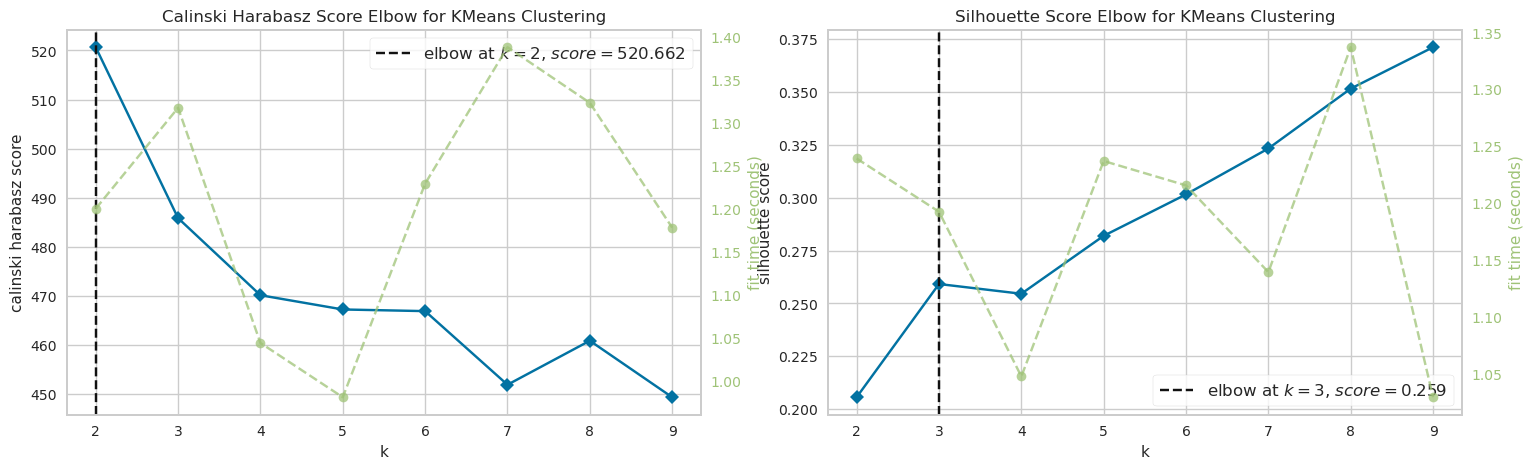

In [212]:
# Calinski_harabasz Scoring Matrix
plt.figure(figsize=(18,5))

plt.subplot(121)
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')
visualizer.fit(df_norm)        # Fit the data to the visualizer
visualizer.finalize()

# Silhouette Scoring Matrix
plt.subplot(122)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(df_norm)        # Fit the data to the visualizer
visualizer.finalize()
plt.show()

**Finally I choose 2 for the optimal k value.**

In [213]:
# K-Means Model
kmeans = KMeans(n_clusters=2, init = 'k-means++').fit(df)
pred = kmeans.predict(df)
df['Cluster'] = pred 

In [214]:
# Inspect the cluster nums
df["Cluster"].value_counts()

0    1435
1     801
Name: Cluster, dtype: int64

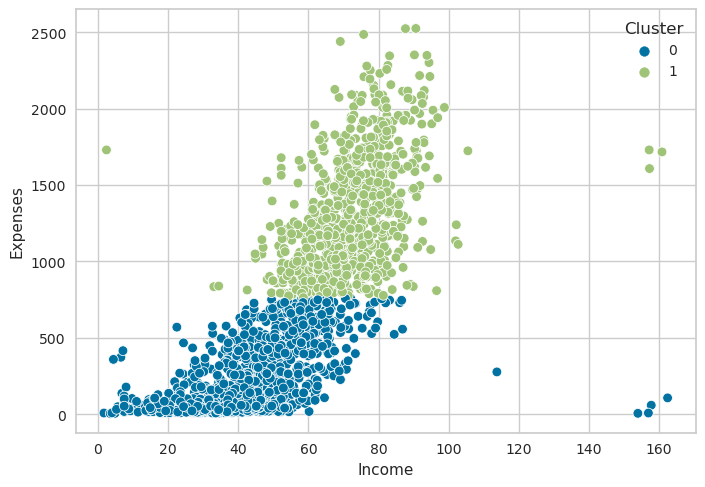

In [215]:
# We could see the the clear difference between the 2 cluster
sns.scatterplot(x='Income',y='Expenses',hue='Cluster',data=df)
plt.show()

## Hierarchial Clustering

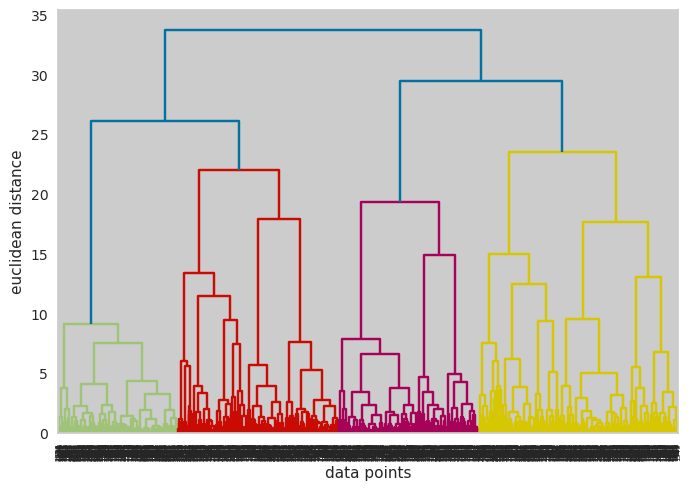

In [216]:
# Dendrogram
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df_norm,method = 'ward')

dendrogram(merg,leaf_rotation=90)
plt.xlabel('data points')
plt.ylabel('euclidean distance')
plt.show()

**In this case best k value is 2**

In [217]:
# Hierarchial cluster with sklearn 
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

cluster = hc.fit_predict(df)
df['Cluster'] = cluster

In [218]:
df["Cluster"].value_counts()

1    1392
0     844
Name: Cluster, dtype: int64

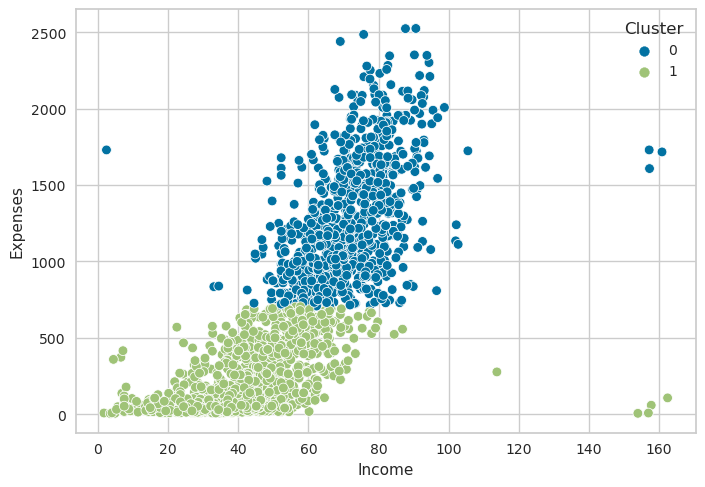

In [219]:
# We could see the the clear difference between the 2 cluster

sns.scatterplot(x='Income',y='Expenses',hue='Cluster',data=df)
plt.show()